# Part 3 

# Library import,data load and basic data exploration 

In [1]:
# install the package
# !pip install ydata-profiling

## import the required libraries

In [2]:
 # import the Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Load the data

In [3]:
def load_data(type):
    file_path = f"data/{type}_wine.csv"
    data = pd.read_csv(file_path, delimiter=",")
    return data

df_red = load_data(type="red")
df_white = load_data(type="white")

In [4]:
# # Load the data 
# file_path1 = "data/red_wine.csv"
# file_path2 = "data/white_wine.csv"
# df_red = pd.read_csv(file_path1, delimiter=",")
# df_white = pd.read_csv(file_path2, delimiter=",")

## Data Exploration

The function performs the following tasks:
1. **Prints the Shape of the Dataset**
2. **Displays the First Five Rows**
3. **Prints Dataset Information**
4. **Checks for Missing Values**

In [5]:
def data_info(df):
    print(f"shape: {df.shape}")
    print("First five rows of the dataset 1:")
    display(df.head())
    print("\nDataset Information:")
    print(df.info())
    print("\nMissing Values in each column:")
    print(df.isnull().sum())
    return None

In [6]:
data_info(df_red)

shape: (571, 4)
First five rows of the dataset 1:


,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.0+ KB
None

Missing Values in each column:
citric acid    0
sulphates      0
alcohol        0
type           0
dtype: int64


In [7]:
df_red.describe()

,citric acid,sulphates,alcohol
count,571.000000,571.000000,571.000000
mean,0.324676,0.588161,10.776883
std,0.175103,0.188478,1.092562
min,0.000000,0.250000,8.000000
25%,0.240000,0.450000,9.900000
50%,0.330000,0.570000,10.800000
75%,0.440000,0.710000,11.600000
max,1.000000,2.000000,12.800000


In [8]:
data_info(df_white)

shape: (78, 4)
First five rows of the dataset 1:


,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  78 non-null     float64
 1   sulphates    78 non-null     float64
 2   alcohol      78 non-null     float64
 3   type         78 non-null     object 
dtypes: float64(3), object(1)
memory usage: 2.6+ KB
None

Missing Values in each column:
citric acid    0
sulphates      0
alcohol        0
type           0
dtype: int64


In [9]:
df_white.describe()

,citric acid,sulphates,alcohol
count,78.000000,78.000000,78.000000
mean,0.316923,0.526795,12.961538
std,0.139091,0.175629,0.971574
min,0.000000,0.250000,9.400000
25%,0.252500,0.370000,12.900000
50%,0.320000,0.525000,13.150000
75%,0.400000,0.615000,13.400000
max,0.670000,0.900000,14.500000


# 1.  Data Profiling

Q1. Using Pandas profiling, created a html file with all the stats and information about the red wine dataset.

In [10]:
# df1.profile_report()
profile = ProfileReport(df_red, title="Profiling Report")
profile.to_file("plots/red_wine_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. 10-fold cross-validation

2. Fitting a model and report the performance metrics of 10-fold cross-validation using red-wine.csv as the training set 

In [12]:
# checking columns name 
print("Columns in red_wine.csv:", df_red.columns.tolist())

Columns in red_wine.csv: ['citric acid', 'sulphates', 'alcohol', 'type']


### Data Split

In [13]:
# Split the data into features (X) and labels (y)
X = df_red.drop('type', axis=1)
y = df_red['type']

### Label Encoding

In [14]:
# Converting the target variable into binary 
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### Feature Scaling

In [15]:
# Scale features for SVM and Random forest
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Model: StratifiedKFold

In [16]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

### model definition

In [17]:
# Defining Models 
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

### Model Evaluation

In [18]:
# Evaluation function
def evaluate_model(model, X, y):
    acc_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    auc_scores = []

    for train_idx, test_idx in cv.split(X, y):
        model.fit(X[train_idx], y[train_idx])
        probs = model.predict_proba(X[test_idx])[:, 1]
        auc = roc_auc_score(y[test_idx], probs)
        auc_scores.append(auc)
    
    return np.mean(acc_scores), np.mean(auc_scores)

In [19]:
# Evaluate all models
results = {}
for name, model in models.items():
    acc, auc = evaluate_model(model, X_scaled, y_encoded)
    results[name] = {'Accuracy': acc, 'AUC': auc}

In [20]:
# Print Results
print("{:<20} {:<10} {:<10}".format("Model", "Accuracy", "AUC"))
for name, scores in results.items():
    print("{:<20} {:.4f}     {:.4f}".format(name, scores['Accuracy'], scores['AUC']))

Model                Accuracy   AUC       
Baseline             0.5289     0.5000
Logistic Regression  0.7949     0.8769
Naive Bayes          0.8248     0.8933
Decision Tree        0.8141     0.8111
SVM-Linear           0.7861     0.8773
SVM-RBF              0.8405     0.9245
Random Forest        0.8492     0.9167


# 3. ROC Curve 

Plotting the ROC curve of the Random Forest classifier from the Python package

In [21]:
# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

### Data Split into training and test sets

In [22]:
# Split data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


### Model: Random Forest

In [23]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Prediction

In [24]:
# Predict probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]

### ROC curve

In [25]:
# Calculate ROC curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve for Random Forest')

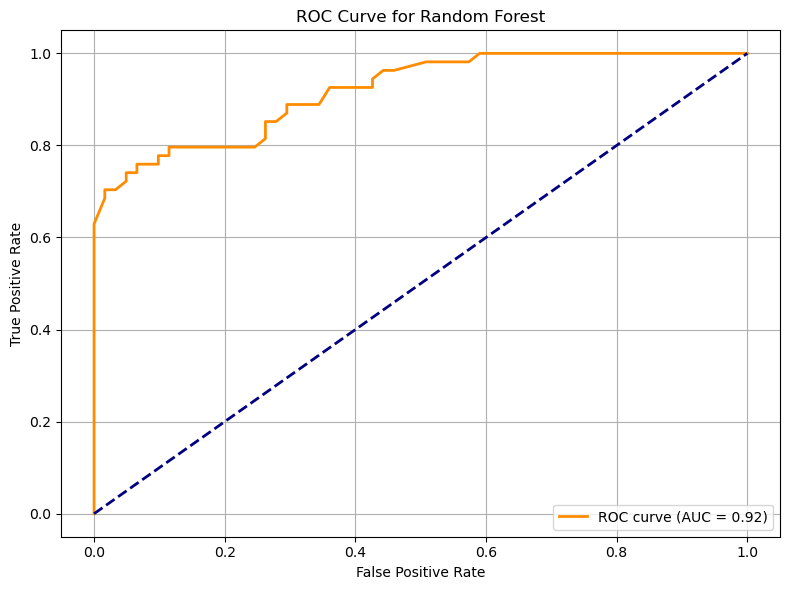

In [26]:
# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


# 4. Best model on white wine

Using the best model obtained above in Q2 (according to AUC), running the model on white-wine.csv, and reporting the AUC score.

### Label Encoding

In [27]:
# Encode the 'type' column (target variable: high = 1, low = 0)
le_white = LabelEncoder()
df_white['type'] = le_white.fit_transform(df_white['type'])

### Feature engineering

In [28]:
# Separate features and target
X_white = df_white.drop(columns='type')
y_white = df_white['type']

In [29]:
# Scale features using the same scaling approach as red wine
X_white_scaled = scaler.transform(X_white)

### Predict the probabilities using the Best Model

In [30]:
# Predict probabilities using the previously trained best model (Random Forest)
y_white_probs = rf_model.predict_proba(X_white_scaled)[:, 1]

In [31]:
# Calculate AUC score
auc_white = roc_auc_score(y_white, y_white_probs)
print(f"AUC on white wine dataset: {auc_white:.4f}")

AUC on white wine dataset: 0.9494


Accuracy on white wine dataset: 0.885
AUC on white wine dataset: 0.949


<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve - White Wine Dataset')

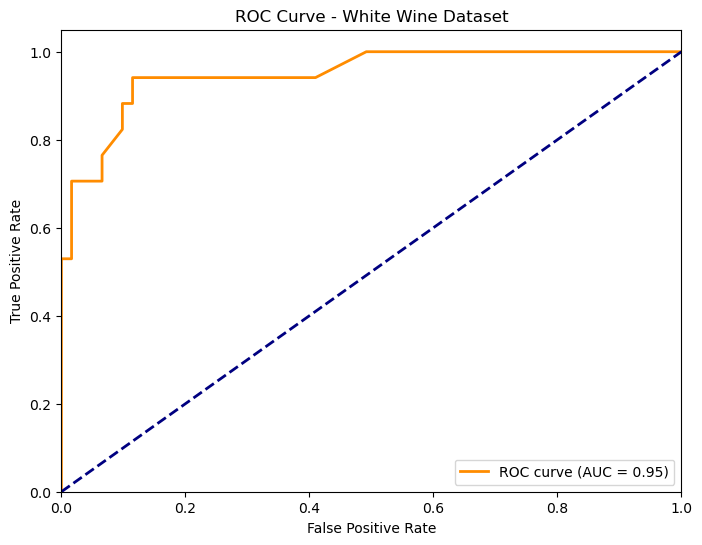

In [32]:
#Calculate Accuracy
y_white_pred = rf_model.predict(X_white_scaled)
white_accuracy = accuracy_score(y_white, y_white_pred)
print(f"Accuracy on white wine dataset: {white_accuracy:.3f}")

#Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_white, y_white_probs, pos_label=1)
white_auc = auc(fpr, tpr)
print(f"AUC on white wine dataset: {white_auc:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
label=f"ROC curve (AUC = {white_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - White Wine Dataset')
plt.legend(loc="lower right")
plt.show()
